### Data Exploration

In [1]:
import pandas as pd

# Read in the data
df = pd.read_csv('./data/train.csv')

# Print number of rows and columns
print(df.shape)

# Get statistics of the data
display(df.describe())
display(df.head())

# Save a random sample of the data to train_sample.csv
df_sample = df.sample(40)
df_sample.to_csv('./data/train_sample.csv')


(595212, 59)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


### Data Cleaning

There was a significant number of missing values in the dataset. The missing values were replaced with NaNs to make it easier to locate them. The columns with high missing values were dropped. The columns with moderate missing values were imputed with the median. The columns with low missing values were imputed with the most frequent value. The remaining columns were left untouched. 

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = './data/train.csv'
data = pd.read_csv(file_path)

# Replace -1 with NaN to locate missing values
data.replace(-1, np.nan, inplace=True)

# Assess missing data commented out for output space
#missing_data = data.isnull().sum()
#missing_percentage = (missing_data / len(data)) * 100

# Deal with missing values
#------------------------------------------------------------------------------------------------------------

# Dropping columns with high missing values
data.drop(['ps_car_03_cat'], axis=1, inplace=True)

# Imputing missing values for moderate missing data columns
imputer = SimpleImputer(strategy='median')
data['ps_reg_03'] = imputer.fit_transform(data[['ps_reg_03']])
data['ps_car_14'] = imputer.fit_transform(data[['ps_car_14']])
data['ps_car_11'] = imputer.fit_transform(data[['ps_car_11']])
data['ps_car_12'] = imputer.fit_transform(data[['ps_car_12']])

# Imputing or dropping rows for columns with low missing values
# Example for imputation
imputer = SimpleImputer(strategy='most_frequent')
for col in ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat','ps_car_01_cat', 'ps_car_07_cat', 'ps_car_09_cat', 'ps_car_05_cat', 'ps_car_02_cat']:
    data[col] = imputer.fit_transform(data[[col]])

# Assess missing data commented out for output space
#missing_data = data.isnull().sum()
#missing_percentage = (missing_data / len(data)) * 100

# Encode categorical variables and scale continuous variables
#------------------------------------------------------------------------------------------------------------

# Identify categorical columns for one-hot encoding
categorical_cols = [col for col in data.columns if '_cat' in col]

# Identify continuous columns for scaling
continuous_cols = [col for col in data.columns if '_bin' not in col and '_cat' not in col and col not in ['id', 'target', 'Unnamed: 0']]

# Remaining columns (binary and untouched columns)
remaining_cols = [col for col in data.columns if col not in continuous_cols + categorical_cols]

# Impute missing values for categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])

# One-Hot Encoding for categorical variables
encoder = OneHotEncoder()
data_encoded = encoder.fit_transform(data[categorical_cols])

# Feature Scaling for continuous variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[continuous_cols])

# Get feature names for the one-hot encoded columns
new_categorical_features = encoder.get_feature_names_out(categorical_cols)

# Combine the transformed data
data_transformed = np.hstack((data_encoded.toarray(), data_scaled, data[remaining_cols].to_numpy()))

# Combine new column names with the columns that didn't change
all_columns = list(new_categorical_features) + continuous_cols + remaining_cols

# Create the transformed DataFrame
data_transformed_df = pd.DataFrame(data_transformed, columns=all_columns)

print(data_transformed_df.shape)

data = data_transformed_df



(595212, 218)


### Data Visualization

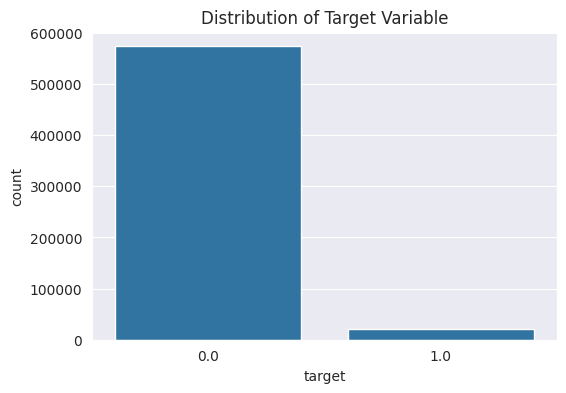

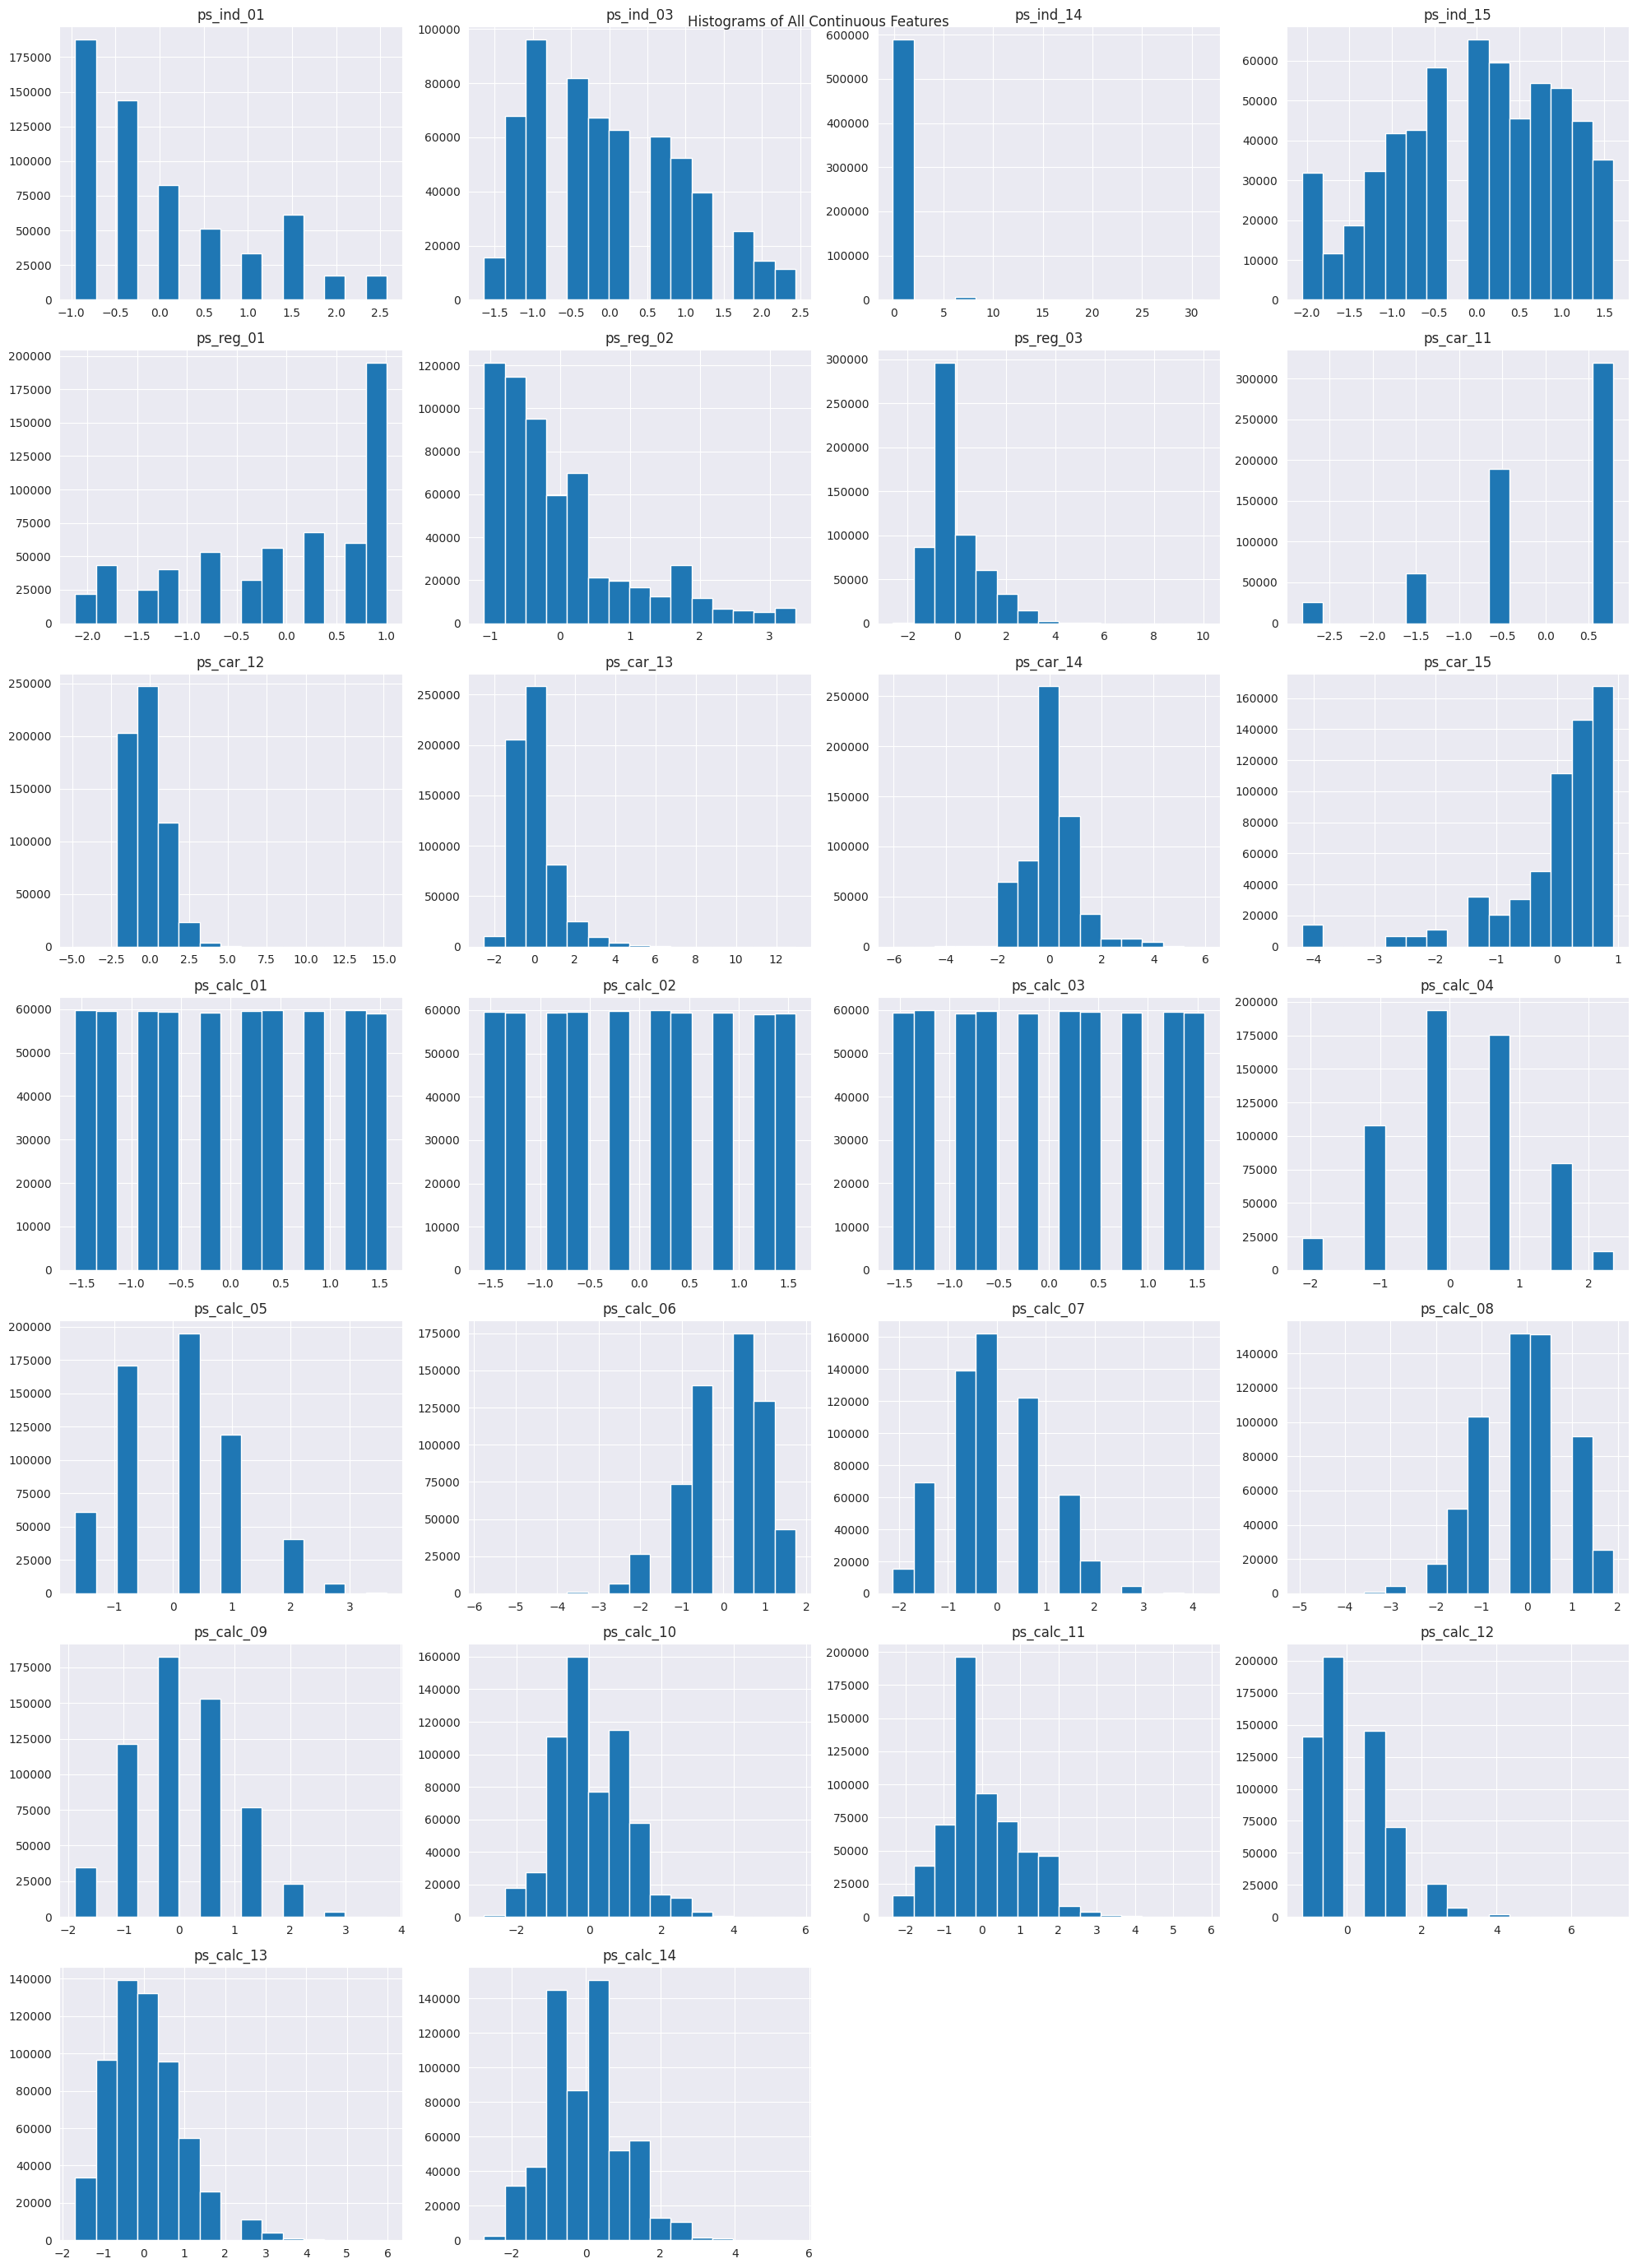

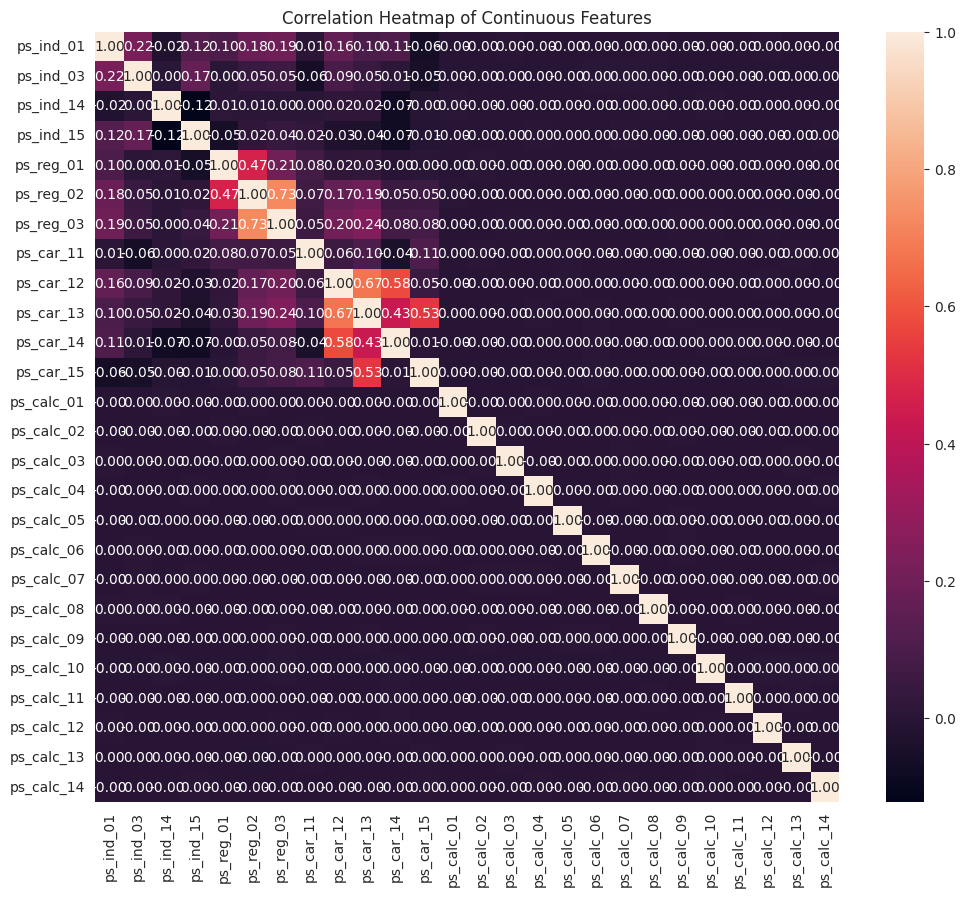

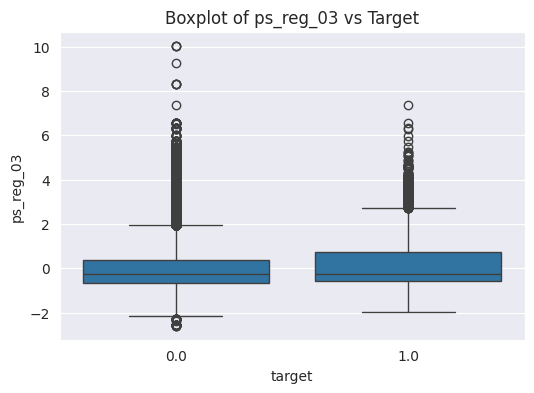

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()

# Histograms for all continuous features
# Adjust the layout parameters (number of rows and columns) as needed
num_rows = 7  # This can be adjusted based on your preference
num_cols = 4  # This can also be adjusted

data[continuous_cols].hist(bins=15, figsize=(20, num_rows * 4), layout=(num_rows, num_cols))
plt.suptitle('Histograms of All Continuous Features')
plt.tight_layout()
plt.show()


# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data[continuous_cols].corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Continuous Features')
plt.show()

# Boxplot for a continuous feature against the target variable
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='ps_reg_03', data=data)
plt.title('Boxplot of ps_reg_03 vs Target')
plt.show()




## Exploratory Data Analysis (EDA) Findings

### Distribution of Target Variable
The distribution of the target variable shows a significant class imbalance with a much higher count of class `0` compared to class `1`. This is typical in datasets concerning rare events, like insurance claims or fraud detection, and needs to be taken into account when building predictive models.

### Boxplot of `ps_reg_03` vs Target
The boxplot indicates that there is not a dramatic difference in the distribution of `ps_reg_03` between the two classes. However, there are outliers present in both classes.

### Correlation Heatmap of Continuous Features
The heatmap provides insight into the linear relationships between continuous features. High positive or negative values indicate a strong correlation. From the heatmap, it looks like most features are not highly correlated, which is generally good for model performance as it suggests less multicollinearity. Some features do exhibit moderate correlation, which may warrant further investigation or feature engineering.

### Histograms of All Continuous Features
The histograms show the distribution of each continuous feature. This can help you identify features with skewed distributions, potential outliers, or those that might benefit from transformation to make them more "normal" (Gaussian), which can improve model performance in some algorithms.



## Model Building

The below implementation uses the following models:
- Logistic Regression
- Naive Bayes
- Random Forest
- Balanced Random Forest
- RUSBoost
- Gradient Boost

The model hyperparameters are tuned using RandomizedSearchCV. 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter grids
param_distributions = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l2']
    },
    'Naive Bayes': {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'Random Forest': {
        'n_estimators': randint(50, 200),
        'max_depth': randint(1, 10),
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 10)
    },
    'Balanced Random Forest': {
        'n_estimators': randint(50, 200),
        'max_depth': randint(1, 10),
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 10)
    },
    'RUSBoost': {
        'n_estimators': randint(50, 200),
        'learning_rate': [0.01, 0.1, 1]
    },
    'Gradient Boost': {
        'n_estimators': randint(50, 200),
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': randint(1, 10),
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 10)
    }
}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:, 1]

    precision = precision_score(y_test, predictions, zero_division=0)
    recall = recall_score(y_test, predictions)
    fscore = f1_score(y_test, predictions)
    auc = roc_auc_score(y_test, probabilities)

    return precision, recall, fscore, auc

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_jobs=-1),
    'Balanced Random Forest': BalancedRandomForestClassifier(n_jobs=-1, sampling_strategy='all', replacement=True),
    'RUSBoost': RUSBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100, replacement=True),
    'Gradient Boost': GradientBoostingClassifier()
}


# Split data into features and target
X = data.drop(['target', 'id'], axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Now evaluate models using the scaled data
# Now evaluate models using the scaled data
for name, model in models.items():
    # Perform a random grid search
    grid_search = RandomizedSearchCV(model, param_distributions[name], n_iter=20, cv=5, random_state=42, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Evaluate the model with the best found parameters
    precision, recall, fscore, auc = evaluate_model(grid_search.best_estimator_, X_train, y_train, X_test, y_test)
    print(f"{name}: Precision={precision}, Recall={recall}, F1-Score={fscore}, AUC={auc}")



/home/frank/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 7 is smaller than n_iter=20. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Logistic Regression: {'penalty': 'l2', 'C': 100}
Logistic Regression: Precision=0.05296675304141596, Recall=0.5558884535607282, F1-Score=0.09671792609820157, AUC=0.627394162004078


/home/frank/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Naive Bayes: {'var_smoothing': 1e-05}
Naive Bayes: Precision=0.05365906078733388, Recall=0.345240838902973, F1-Score=0.09288194444444443, AUC=0.5859999911271967


/home/frank/.local/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for Random Forest: {'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 89}
Random Forest: Precision=0.05307105767881368, Recall=0.5229315510486288, F1-Score=0.09636251672223048, AUC=0.6244503885082281


/home/frank/.local/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for Balanced Random Forest: {'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 104}
Balanced Random Forest: Precision=0.05032731426562981, Recall=0.5280018437427979, F1-Score=0.09189546940494575, AUC=0.6099895445988722
Best parameters for RUSBoost: {'learning_rate': 1, 'n_estimators': 171}
RUSBoost: Precision=0.04925538803070946, Recall=0.490896519935469, F1-Score=0.08952777252380051, AUC=0.5904665072412524
Best parameters for Gradient Boost: {'learning_rate': 0.01, 'max_depth': 9, 'min_samples_leaf': 7, 'min_samples_split': 3, 'n_estimators': 181}
Gradient Boost: Precision=0.5, Recall=0.0004609356994699239, F1-Score=0.0009210223347916187, AUC=0.6314878295036845


In [8]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE

resampling_techniques = {
    'Random Under-Sampling': RandomUnderSampler(),
    'Random Over-Sampling': RandomOverSampler(),
    'Tomek Links': TomekLinks(n_jobs=-1),
    'SMOTE': SMOTE(n_jobs=-1)
}

# Updated models dictionary with the best parameters from the previous step
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1, C=100, penalty='l2'),
    'Naive Bayes': GaussianNB(var_smoothing=1e-05),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_jobs=-1, max_depth=8, min_samples_leaf=7, min_samples_split=5, n_estimators=89),
    'Balanced Random Forest': BalancedRandomForestClassifier(n_jobs=-1, sampling_strategy='all', replacement=True, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=104),
    'RUSBoost': RUSBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=171, replacement=True, learning_rate=1),
    'Gradient Boost': GradientBoostingClassifier(learning_rate=0.01, max_depth=9, min_samples_leaf=7, min_samples_split=3, n_estimators=181)
}


# Apply resampling techniques and evaluate models
for resample_name, resampler in resampling_techniques.items():
    X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)
    
    # Now evaluate all models using the resampled data
    for name, model in models.items():
        precision, recall, fscore, auc = evaluate_model(model, X_resampled, y_resampled, X_test, y_test)
        print(f"Resampling: {resample_name}, Model: {name}: Precision={precision}, Recall={recall}, F1-Score={fscore}, AUC={auc}")


Resampling: Random Under-Sampling, Model: Logistic Regression: Precision=0.0526076901463246, Recall=0.5609587462548974, F1-Score=0.09619412717859542, AUC=0.6231023975182384
Resampling: Random Under-Sampling, Model: Naive Bayes: Precision=0.05196168899354059, Recall=0.3763539986171929, F1-Score=0.09131577475815021, AUC=0.5823320453891465
Resampling: Random Under-Sampling, Model: Random Forest: Precision=0.05165899418049162, Recall=0.5482830145194746, F1-Score=0.09442162290885278, AUC=0.6239971502066897
Resampling: Random Under-Sampling, Model: Balanced Random Forest: Precision=0.04898408179112204, Recall=0.5233924867480987, F1-Score=0.08958403187313861, AUC=0.6023511751208139
Resampling: Random Under-Sampling, Model: RUSBoost: Precision=0.04145438176498271, Recall=0.46692786356303295, F1-Score=0.07614823723972036, AUC=0.5340499330183724
Resampling: Random Under-Sampling, Model: Gradient Boost: Precision=0.05323629948175102, Recall=0.5563493892601982, F1-Score=0.09717414056839224, AUC=0.

/home/frank/.local/lib/python3.8/site-packages/imblearn/over_sampling/_smote/base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Resampling: SMOTE, Model: Logistic Regression: Precision=0.04974005611487044, Recall=0.5556579857109933, F1-Score=0.09130673533922856, AUC=0.6062736111804522
Resampling: SMOTE, Model: Naive Bayes: Precision=0.04049020585985567, Recall=0.5611892141046324, F1-Score=0.07553080943592289, AUC=0.5475683931989835
Resampling: SMOTE, Model: Random Forest: Precision=0.05739421868454127, Recall=0.06314819082737957, F1-Score=0.06013387468451662, AUC=0.5647755605931932
Resampling: SMOTE, Model: Balanced Random Forest: Precision=0.045829608746475965, Recall=0.3072136436967043, F1-Score=0.07976065818997756, AUC=0.5531441744774394
Resampling: SMOTE, Model: RUSBoost: Precision=0.035398230088495575, Recall=0.0009218713989398478, F1-Score=0.001796945193171608, AUC=0.5976054309239247
Resampling: SMOTE, Model: Gradient Boost: Precision=0.0, Recall=0.0, F1-Score=0.0, AUC=0.5688727944935641


### Under-Sampling vs. Over-Sampling Techniques:
- The results show that **under-sampling techniques** (Random Under-Sampling and Tomek Links) and **over-sampling techniques** (Random Over-Sampling and SMOTE) yield varying results across different models.
- In some cases, under-sampling seems to slightly improve recall but at the cost of precision, which is common as the model becomes more sensitive to the minority class.
- Over-sampling, particularly with SMOTE, tends to increase recall more significantly but can sometimes lead to lower precision, indicating a higher number of false positives.

### Performance of Logistic Regression:
- **(i) No Rebalancing**: Logistic Regression shows moderate recall but low precision, suggesting it can identify the minority class to some extent but also misclassifies many majority class instances as minority.
- **(ii) Oversampling**: With oversampling, both recall and precision see slight improvements. This indicates that increasing the presence of the minority class helps the model learn its characteristics better.
- **(iii) Undersampling**: Similar to oversampling, undersampling increases recall but often decreases precision.
- **Hypothesis**: Logistic Regression's linear nature might limit its ability to handle the complex patterns often present in imbalanced datasets. The balancing techniques help it recognize the minority class better, but at the expense of making more false positive errors.

### Random Forest vs. Balanced Random Forest:
- The **Balanced Random Forest** consistently outperforms the standard Random Forest in terms of recall and AUC. This suggests that the method used by Balanced Random Forest to address class imbalance (creating balanced bootstrap samples) is effective.
- The standard Random Forest fails to identify the minority class effectively (evident from the zero recall), possibly due to the overwhelming majority class in the training data.


In [9]:
# Ensemble 1 - Voting Classifier with Soft Voting uses all models

from sklearn.ensemble import VotingClassifier

# Create the ensemble classifier
ensemble_clf = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='soft', n_jobs=-1)

# Evaluate the ensemble classifier
precision, recall, fscore, auc = evaluate_model(ensemble_clf, X_train, y_train, X_test, y_test)
print(f"Ensemble Classifier: Precision={precision}, Recall={recall}, F1-Score={fscore}, AUC={auc}")


Ensemble Classifier: Precision=0.061081185071181224, Recall=0.2926941691634017, F1-Score=0.10107039115037204, AUC=0.6203382982882787


In [10]:
# Ensemble 2 - Voting Classifier with Soft Voting uses the top 3 models and under-sampling

from sklearn.ensemble import VotingClassifier
from imblearn.under_sampling import RandomUnderSampler

# Under-sample the training data
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Initialize individual models
brf = BalancedRandomForestClassifier(n_jobs=-1, sampling_strategy='all', replacement=True)
rusboost = RUSBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100, replacement=True)
gboost = GradientBoostingClassifier()

# Train each model on the under-sampled data
brf.fit(X_resampled, y_resampled)
rusboost.fit(X_resampled, y_resampled)
gboost.fit(X_resampled, y_resampled)

# Create the ensemble classifier
ensemble_clf = VotingClassifier(
    estimators=[
        ('brf', brf),
        ('rusboost', rusboost),
        ('gboost', gboost)
    ],
    voting='soft',
    n_jobs=-1
)

# Train and evaluate the ensemble classifier
ensemble_precision, ensemble_recall, ensemble_fscore, ensemble_auc = evaluate_model(ensemble_clf, X_train, y_train, X_test, y_test)
print(f"Ensemble Classifier UnderSampling: Precision={ensemble_precision}, Recall={ensemble_recall}, F1-Score={ensemble_fscore}, AUC={ensemble_auc}")


Ensemble Classifier UnderSampling: Precision=0.20634920634920634, Recall=0.0029960820465545056, F1-Score=0.005906406179009542, AUC=0.6241122615679253


### Ensemble Classifier Model:

- **Ensemble 1**: Shows a balance between precision and recall but doesn't excel in either. This ensemble seems to provide a more balanced trade-off, offering a middle ground in terms of both precision and recall.
- **Ensemble 2 (With Undersampling)**: Significantly improves precision but at the cost of drastically reducing recall. This ensemble is more conservative, prioritizing precision over recall, which might indicate an overly cautious approach in predicting the minority class.
- **Comment**: Compared to Adaboost and Gradient Boost, the ensembles don't necessarily perform better across all metrics. However, Ensemble 1 does offer a practical compromise.
- Soft voting was used in both cases to leverage the probability estimates of the models. This is particularly useful for models like Random Forest that don't natively support probability estimates.

### Reasoning for the Second Ensemble:

- The second ensemble model was specifically created with undersampling to see if a more balanced class distribution during training could enhance the model's ability to generalize. The intention was to combine the strengths of models that perform well on undersampled data, aiming to boost overall performance, particularly in terms of precision. However, the results indicate that while precision improved, the model's ability to identify the minority class (recall) was significantly compromised.
